## **09. Representasi Pengetahuan (Knowledge Representation)**

---


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
data_testing = pd.read_csv('../../08. Evaluasi Pola (Pattern Evaluation)/Hasil/hasil_prediksi-diet(bilstm).csv')

In [100]:
#eda dari data_testing jumlah kosa kata dan kata terpanjang pada full_text
print(data_testing['full_text'].str.split().apply(len).describe())



count    6201.000000
mean       16.397033
std        12.765898
min         1.000000
25%         7.000000
50%        12.000000
75%        22.000000
max        62.000000
Name: full_text, dtype: float64


In [101]:
#tampilkan atribut yang ada di data
data_testing.columns

Index(['username', 'full_text', 'topic', 'topic_probability',
       'predicted_label', 'probability_emotion'],
      dtype='object')

In [102]:
#ubah nama atribut topic_cluster menjadi topic
data_testing.rename(columns={'topic_cluster':'topic'}, inplace=True)

#tambahkan atribut probability = 0
data_testing['probability'] = 0

#tambahkan atribut konteks dengan 0
data_testing['context'] = 0


In [103]:
#tampilkan hanya kolom full_text, topic_cluster, emotion dan username
merged_df = data_testing[['username','full_text','topic', 'predicted_label']]

merged_df.head(10)

,username,full_text,topic,predicted_label
0,Fifayna,@XXXbyefelicia lol baru je tegur org comment pasal diet mesti cukup lemak utk awet muda/ youth look https://t.co/hbza10KTzr,3,Sad
1,nastyyyycat,Untuk saat ini bukannya gak mau diet tapi lagi suka sama bentuk badan sekarang tapi ttp jaga makan,0,Joy
2,arressssssssss,@nawwme Kenapa banyak yg pengen diet dah,0,Joy
3,leelyylee,Rekom menu buat diet makasii kakanya udah nge-spill menu nya,1,Joy
4,woyfit,@rimafebrr Kak kan dietnya udah ada perubahan nih apakah setelah itu terus bisa makan makanan kek dulu lagi?tapi dengan keterbatasan tentunya iya ngga? atau masih makan makanan yang sama seperti pas lagi diet?,0,Sad
5,ngacmuk,melihat tips diet... hmzz masih oke untuk diusahakan next tweet (gak makan krupuk) GABISAAA ARGHHH,3,Anger
6,kvpall,rutsuki adalah cewek2 ketika disuruh diet https://t.co/bP6YAoM23Q,4,Anger
7,nhr_shinosuke,@peachtobeli Untukk Baekhyun semogaaa apa yg sedang kamu kerjakaan selama ini diberikan kelancaran tanpa bebas hambatan. Terus haru sehat juga no no diet lagi pokoknya. Makan apa yg lu mau https://t.co/twlHJRCM7R,0,Joy
8,ziqanimnim,Ye betul siap ckp diet la kurang kn la mkn itu imi yada yada dahtu sudahnya last last kirg yg tk hbis bgi aku jugk jadi alam flora makan yang tak habis tu,4,Joy
9,jrdsty,@dhharu8610 @Adliinnn27 @sugakasep @taqdirkun @kegblgnunfaedh Diet puberty sama perawatan biasa ga bisa bikin bentuk dasar hidung tetiba sempit ujungnya jadi lancip dan tetiba tulang hidung makin tinggi tiap comeback. Kecuali perawatan oplas baru deh bisa ngubah bentuk.,0,Neutral


In [104]:
#count emotion
emotion_count = merged_df['predicted_label'].value_counts()
emotion_count

predicted_label
Joy        2360
Anger      2125
Neutral    1075
Sad         397
Fear        131
Love        113
Name: count, dtype: int64

Text(0.5, 0, 'Emotion')

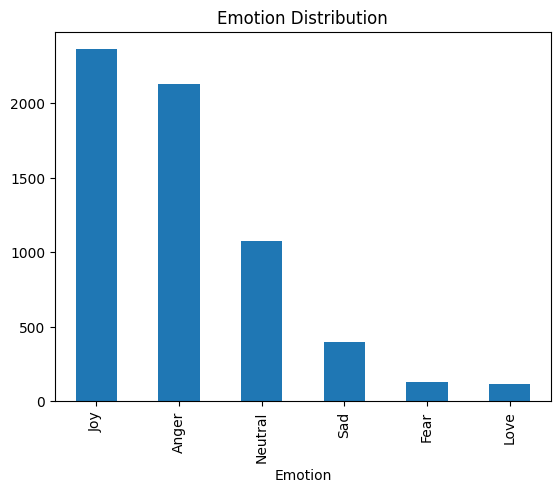

In [105]:
#visualisasikan value_counts dari emotion jadi graph
emotion_count.plot(kind='bar')
plt.title('Emotion Distribution')
plt.xlabel('Emotion')

In [106]:
jumlah_nan = merged_df.isna().sum()

print(jumlah_nan)

username           0
full_text          0
topic              0
predicted_label    0
dtype: int64


## Knowledge

### Per-Topic

In [107]:
topic_cluster_counts = merged_df['topic'].value_counts().reset_index()
topic_cluster_counts

,topic,count
0,0,1484
1,3,1259
2,2,1254
3,4,1230
4,1,974


In [115]:
#menghitung total account dari username yang ada di data per masing-masing topik
account_counts = merged_df.groupby('topic')['username'].nunique().reset_index()
account_counts

,topic,username
0,0,1325
1,1,892
2,2,1150
3,3,1133
4,4,1157


<Axes: xlabel='predicted_label', ylabel='count'>

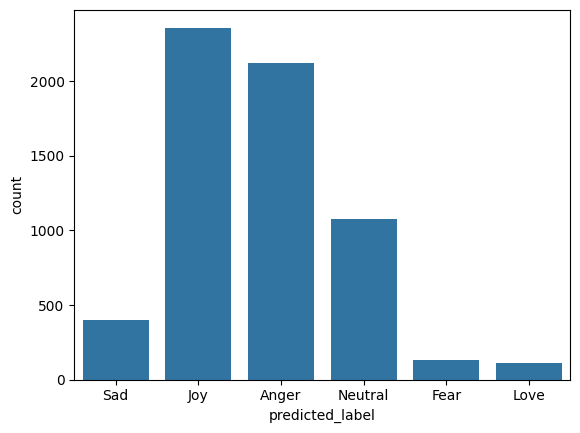

In [108]:
#tampilkan semua data tanpa melihat topic
sns.countplot(x='predicted_label', data=merged_df)

In [109]:
topik_ke = 0

topic_cluster_0_df = merged_df[merged_df['topic'] == topik_ke]
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='predicted_label', ascending=True)

count_emotion = topic_cluster_0_df['predicted_label'].value_counts().reset_index()
count_emotion

,predicted_label,count
0,Joy,545
1,Anger,531
2,Neutral,243
3,Sad,111
4,Fear,39
5,Love,15


<Axes: xlabel='predicted_label', ylabel='count'>

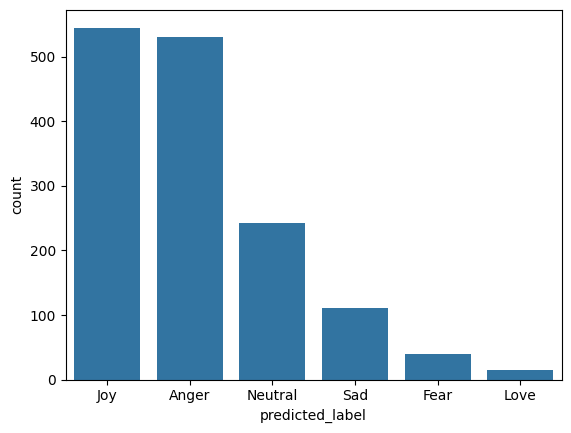

In [110]:
sns.barplot(x='predicted_label', y='count', data=count_emotion)


In [111]:
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='predicted_label', ascending=False)


#tampilkan semuanya di output jangan dibatasi
pd.set_option('display.max_rows', None)
topic_cluster_0_df.head(10)


,username,full_text,topic,predicted_label
3253,UstazFitnes,Mitos dalam journey turun berat : 1. Di larang makan malam 2. Diet makan buah &amp; biskut sahaja 3. Elakkan makan nasi 4. Minum air sejuk lemak jadi beku 5. Nak kurus jogging sahaja Repost &amp; Likes Follow Untuk Tip sihat Hari2.,0,Sad
3742,renjunfttm,no more diet diet dari sma ga ampuh ampuh cukup stress kecil dan tb tb turun 5 kilo,0,Sad
1694,rirtaro,@celejbrity ga diet dong itu namanya yank,0,Sad
1185,haloOCTA,@rimaddict Aku aja yang mulai konsisten diet dari oktober 2023 baru turun 7 5kg aja happy banget apalagi kamu yang turunnya hampir 1/2-nya. Jadi semangat diet dan olahraga nih biar punya berat badan ideal. Tinggi kita mirip soalnya ternyata kalau mau bisa yaaa jadi sekurus itu.,0,Sad
1162,PutriNurIndahP,@rimaddict Congrats! Saya September 2021 dulu juga pernah diet selama 8 bulan. Yang awalnya 68 kg menjadi 53 kg. TB saya 153 cm btw. Tidak ada menu khusus ala-ala diet seperti kebanyakan orang. Saya hanya konsumsi sayur buah dan air putih selama 8 bulan. Bulan Mei 2022 sudah 53 kg.,0,Sad
3840,txtyana57,@tanyarlfes ga gtu aturan mainnya nder tetap makan tp ga boleh berlebihan klo kamu mau diet sarapan pagi roti gandum siang makan nasi + lauk &amp; sayur (porsi dikit yaa) jam 5 atau 6 sore makan nasi + lauk (porsi dikit) diatas jam 8 jangan makan berat² tp boleh ngemil buah/roti gandum gpp,0,Sad
1141,soekhuna,Malam ini ada motivasi diet dan olahraga. Harus bisa ini mah BMI ku masih normal tp aku terlihat gemuk kadang suka ngga PD kalo foto full badan,0,Sad
5040,tanyaners,Ada beberapa makanan yang tidak boleh dimakan setelah operasi caesar. Karena itulah melakukan diet dengan menjaga pola makan dan mengetahui jelas apa yang boleh dikonsumsi menjadi hal penting. Lantas apa saja pantangannya? https://t.co/3bLl7lBtCQ,0,Sad
1738,jupedepee,aku pikir aku salah satu orang yang gak bisa gemuk. ternyata sekarang berat badan ku hampir 70kg. besok diet sambil jaga bumi fix,0,Sad
1057,lleubah,gue rencananya diet tp malem kemaren jam setengah sepuluh makan indomie nyemek hari ini setengah sembilan makan nasi goreng. APA ITU DIET? WKWKWWK https://t.co/A3Sm4a2WEe,0,Sad


In [113]:
#ukuran kolom jangan dibatasi untuk full_text
pd.set_option('display.max_colwidth', None)

#tampilkan hanya emosi anger
topic_cluster_0_df[topic_cluster_0_df['predicted_label'] == 'Joy'].head(20)

,username,full_text,topic,predicted_label
1821,diethingy,diet! kalau bb stuck selama 1 5 bulan tp lingkar tubuh menyusut ada baiknya lanjutin defkal atau reverse diet ya? sender ngegym lagi proses cutting.,0,Joy
1946,diet__gogogo,59.6kg(-0.3kg),0,Joy
1769,MapenseliWa,@AQtee @RadioCitizenFM @bensu_mk @Ronixxthedon @AQtee @RadioCitizenFM @bensu @Ronixxthedon #WaksTikiTaka Qty hio diet yako imeweza siati ooh kajiado massive locked in,0,Joy
1775,MapenseliWa,@AQtee @RadioCitizenFM @bensu_mk @Ronixxthedon @AQtee @RadioCitizenFM @bensu @Ronixxthedon #WaksTikiTaka Qty hio diet yako imeweza siati ooh kajiado massive locked in,0,Joy
1789,Uu_tu2,Bismillah diet turun 15kg hehe aamiin,0,Joy
1790,Uu_tu2,Ucapan mau diet minggu lalu cuma bullshit doang ternyata,0,Joy
1794,SyafiqAkia,Pernah dgar tak pasal crash diet? Mkn sikit sgt tlampau low kalori utk cepat kurus Berlangsung dlm tempoh masa yg singkat Jadi punca kekurangan nutrien penting‍️ Risiko kehilangan otot &amp; perlahankan metabolism Tak sesuai utk long term health Jom follow &amp; RT,0,Joy
1802,snarendipity,Makasih militer jiminnya gak diet lagi. Seneng banget liat badannya berisi gini https://t.co/vg4gHeioUF,0,Joy
1803,ChinameRomeo,@zeddy_wacho ndiri pa diet,0,Joy
1815,vix8en,gw akan menghadapi kuliah dengan NO FAP NO SURF CLEAN DIET AND THERAPY!!,0,Joy


# Konten Tentang Timnas Indonesia di Vidio

## 1. Dukungan Penggemar untuk Timnas Indonesia (Joy)
**Konten Senang**: Video yang menyoroti dukungan penuh dari para penggemar untuk Timnas Indonesia, termasuk ucapan selamat dan sorak-sorai setelah kemenangan dalam berbagai pertandingan.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Timnas Indonesia! 🎉 Saksikan momen-momen kegembiraan dan ucapan selamat untuk para pemain. #DukungTimnas [link video]

## 2. Perjalanan Timnas Indonesia di Babak Kualifikasi Piala Dunia dan Piala Asia (Joy)
**Konten Senang**: Video rekapitulasi perjalanan Timnas Indonesia di babak kualifikasi, termasuk momen-momen penting dan wawancara dengan pemain serta pelatih.

**Contoh Tweet**:
> Timnas Indonesia tampil impresif di kualifikasi Piala Dunia dan Piala Asia! 🎉 Saksikan rekap perjalanan mereka dan wawancara eksklusif. #TimnasKualifikasi [link video]

## 3. Keberhasilan Timnas Indonesia Lolos ke Putaran Ketiga Kualifikasi Piala Dunia 2026 (Joy)
**Konten Senang**: Cuplikan video dari momen-momen gol dan selebrasi pemain serta fans. Kutipan inspiratif dari pelatih dan pemain tentang perjalanan mereka menuju kualifikasi.

**Contoh Tweet**:
> Timnas Indonesia lolos ke putaran ketiga kualifikasi Piala Dunia 2026! 🎊 Saksikan momen-momen terbaik dan kegembiraan para pemain dan fans! #TimnasLolos [link video]

## 4. Penampilan Anang Menyanyikan "Indonesia Pusaka" Sebelum Pertandingan (Anger)
**Konten Marah**: Video atau artikel yang membahas reaksi emosional penggemar terhadap penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan, dengan fokus pada kontroversi dan pendapat yang beragam.

**Contoh Tweet**:
> Penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan menimbulkan berbagai reaksi. Apa pendapat kalian? #IndonesiaPusaka [link video]

## 5. Performa Thom Haye dan Verdonk di lapangan saat bersama timnas(Love)
**Konten Cinta**: Video reaksi penggemar yang menunjukkan dukungan dan kasih sayang mereka kepada pemain seperti Verdonk dan Haye. Testimoni dari fans tentang kecintaan mereka pada pemain dan tim.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Verdonk dan Haye! ❤️ Saksikan reaksi dan testimoni mereka tentang kecintaan pada Timnas Indonesia. #LoveForTimnas [link video]

## 6. Momen Bersejarah dan Gol Penting Timnas Indonesia (Joy)
**Konten Senang**: Cuplikan video dari momen-momen bersejarah dan gol-gol penting yang dicetak oleh Timnas Indonesia dalam babak kualifikasi dan turnamen AFF.

**Contoh Tweet**:
> Gol-gol bersejarah dari Timnas Indonesia di babak kualifikasi dan turnamen AFF! 🎊 Saksikan momen-momen terbaik di sini. #TimnasGol [link video]

## 7. Kondisi Rumput di Stadion Gelora Bung Karno Setelah Konser (Fear)
**Konten Takut**: Video yang menunjukkan kondisi rumput di Stadion Gelora Bung Karno setelah konser, dengan sorotan pada keluhan penggemar mengenai dampaknya pada performa timnas Indonesia di lapangan.

**Contoh Tweet**:
> Lihat kondisi rumput Stadion Gelora Bung Karno setelah konser dan bagaimana ini memengaruhi performa timnas Indonesia. #GBKRumput [link video]

## 8. Diskusi Strategi Pelatih Shin Tae-yong dan Potensi Pemain Diaspora (Joy)
**Konten Senang**: Video yang menyoroti strategi pelatih Shin Tae-yong dan performa pemain seperti Ernando dan Verdonk, termasuk diskusi tentang potensi pemain diaspora untuk memperkuat timnas.

**Contoh Tweet**:
> Lihat bagaimana strategi Shin Tae-yong membawa Timnas Indonesia ke puncak! 🎉 Diskusi tentang pemain diaspora dan potensi mereka di sini. 💪🇮🇩 [link video]

## 9. Kondisi Lapangan dan Performa Pemain di Berbagai Pertandingan (Fear)
**Konten Takut**: Video yang menunjukkan kondisi lapangan yang kurang baik dan dampaknya pada performa pemain Timnas Indonesia di berbagai pertandingan.

**Contoh Tweet**:
> Kondisi lapangan yang kurang baik memengaruhi performa pemain Timnas Indonesia. Lihat bagaimana ini berdampak pada pertandingan. #KondisiLapangan [link video]

## 10. Pengalaman Penggemar Menonton Pertandingan Timnas Indonesia (Fear)
**Konten Takut**: Video yang menunjukkan pengalaman penggemar saat menonton pertandingan timnas, dengan fokus pada momen-momen penting dan rasa takut akan ketinggalan (FOMO).

**Contoh Tweet**:
> Banyak yang merasa FOMO karena tidak bisa menonton langsung Timnas. 😢 Simak cerita mereka dan dukung Timnas dari rumah! #FOMOTimnas [link video]